In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

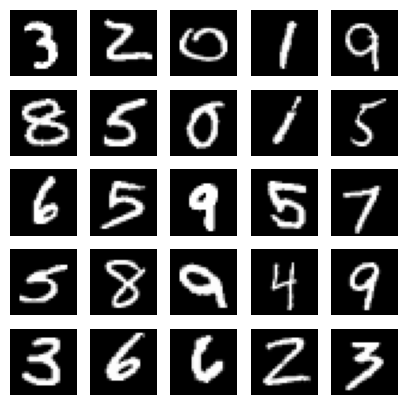

In [3]:
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [4]:
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [5]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [6]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [7]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [8]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [9]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)


Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4286 - accuracy: 0.8677
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1943 - accuracy: 0.9422
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1503 - accuracy: 0.9541
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1285 - accuracy: 0.9605
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1110 - accuracy: 0.9664
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0992 - accuracy: 0.9689
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0940 - accuracy: 0.9706
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0867 - accuracy: 0.9730
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9742
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9765

In [11]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


79/79 [==============================] - 0s 814us/step - loss: 0.0683 - accuracy: 0.9817

Test accuracy: 98.2%
